# Data preprocessing
Cleaning data by removing \n characters, then we perform NFD transformation to separate diacritics from the simple characters (except ~) and go back to NFC ([source here](https://es.stackoverflow.com/questions/135707/c%C3%B3mo-puedo-reemplazar-las-letras-con-tildes-por-las-mismas-sin-tilde-pero-no-l)). This way we converted all characters with diacritics to the simple character. Finally, 5-letter words are saved in a list.

## Letter frequency visualization
Counter object from colletions is used to count the frequency of each letter. Then, a histogram is used to visualize these values.

Counter({'a': 10730, 'e': 6850, 'o': 6194, 'r': 4417, 'i': 3912, 'l': 3262, 's': 3218, 'n': 2919, 'c': 2781, 'u': 2621, 't': 2462, 'p': 1982, 'm': 1867, 'd': 1775, 'b': 1462, 'g': 1245, 'f': 926, 'h': 914, 'j': 882, 'v': 846, 'z': 697, 'ñ': 416, 'y': 370, 'x': 135, 'q': 130, 'k': 46, 'w': 8})
12614


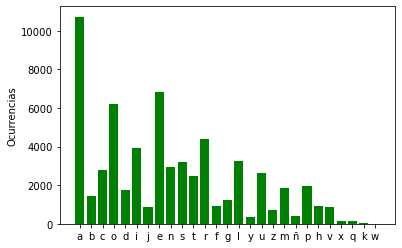

In [14]:
from collections import Counter
import re
from unicodedata import normalize
import matplotlib.pyplot as plt

data = open('0_palabras_todas.txt', encoding="utf8")
count = 0
words = []
chars = Counter()

while True:
    count +=1
    line = data.readline()
    line = line[:-1]

    if not line:
        break

    if (len(line) == 5):
        # -> NFD y eliminar diacríticos
        line = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", line), 0, re.I
    )

        # -> NFC
        line = normalize('NFC', line)
        words.append(line)
        chars.update(Counter(line))


chars.pop('O')
chars.pop('(')
chars.pop(' ')
print(chars)
print(len(words))
data.close()
plt.bar(list(chars.keys()), chars.values(), color='g')
plt.ylabel('Ocurrencias')
plt.show()

# get frequency
#https://es.stackoverflow.com/questions/135707/c%C3%B3mo-puedo-reemplazar-las-letras-con-tildes-por-las-mismas-sin-tilde-pero-no-l

In [15]:
import numpy as np

def remove_at(i, s):
    return s[:i] + s[i+1:]

def reduce_word_pool(wordlist, sel_word, pattern):
    '''
    Given a word and its pattern, reduce the list of possible words given that pattern.
    '''
    # First, we extract the ternary info from the word and the pattern, to see which letter we will ignore, etc..
    # Getting indeces:
    ind_gray = [i for i,x in enumerate(pattern) if x==0]
    ind_yellow = [i for i,x in enumerate(pattern) if x==1]
    ind_green = [i for i,x in enumerate(pattern) if x==2]
    ind_gray_yellow = [i for i,x in enumerate(pattern) if x==0 or x ==1]

    ignore = [sel_word[ind] for ind in ind_gray]
    present = [sel_word[ind] for ind in ind_yellow]
    correct = [sel_word[ind] for ind in ind_green]
    # ignore contains letters that are gray (we don't need the index)
    # present contains letters that are yellow (we will need to use also the index, maybe tuple or dict)
    # correct contains letters that are green (we will need to use also the index, maybe tuple or dict)

    # Loop
    new_wordlist = []
    for word in wordlist:
        char_list = ignore
        match = [characters in char_list for characters in word]
        if not any(match):
            # Now we have words that do not contain gray letters
            correct_pos = [word[ind] for ind in ind_green]
            if correct_pos == correct:
                # # Now we have words that have green chars in the respective position
                # # Pick the word, remove the char in the index pos of yellow and check if exists in the other chars
                
                # Second approach:
                # First check that yellow words are not in yellow positions
                present_pos = [word[ind] for ind in ind_yellow]
                match = [i for i, j in zip(present, present_pos) if i == j]
                if not match:
                    # Now we are sure that there are no correct yellow words
                    # Now check that all the yellow letters appear in the other positions
                    to_check = [word[ind] for ind in ind_gray_yellow]
                    flag = []
                    flag2 = 0
                    for elem in present:
                        for i in to_check:
                            if elem == i:
                                flag.append(True)
                        if not any(flag):
                            break
                        else:
                            flag = []
                            flag2 += 1
                    if len(present) == flag2:
                        new_wordlist.append(word)

    return new_wordlist

wordlist = ['cebra','hijos','realp', '12345', 'bicro']

a = reduce_word_pool(wordlist, 'barco', [2,0,1,1,2])
print(a)

['bicro']


In [16]:
wordlist = words
guess_word = 'laser'
pattern = [2,1,0,0,0]

wordlist = reduce_word_pool(wordlist, guess_word, pattern)
print(wordlist)
print(len(wordlist))

['liaba', 'liado', 'liana', 'liaza', 'libad', 'liban', 'liban', 'libia', 'licia', 'licua', 'licua', 'licua', 'lidia', 'lidia', 'ligad', 'ligan', 'lijad', 'lijan', 'lilac', 'lilao', 'limad', 'liman', 'linao', 'linda', 'linda', 'linfa', 'litad', 'litan', 'liuda', 'liuda', 'llaca', 'llaga', 'llaga', 'llago', 'llago', 'llama', 'llama', 'llamo', 'llamo', 'llana', 'llano', 'llapa', 'llapa', 'llapo', 'llapo', 'loaba', 'loado', 'local', 'locha', 'logia', 'loica', 'loina', 'loina', 'lomba', 'longa', 'lonja', 'lucha', 'lucha', 'lucia', 'lucia', 'lucma', 'ludan', 'ludia', 'ludia', 'luian', 'lujad', 'lujan', 'lumia', 'lunfa', 'lupia', 'luvia', 'luxad', 'luxan', 'luyan', 'luzca']
75


In [17]:
def ternary_to_list(number):
    res = [0,0,0,0,0]
    len_number = len(str(number))
    for i in range(len_number): res[4-i] = int(str(number)[len_number-1-i]) 
    return res

def list_to_ternary(number):
    res = ""
    for i in range(len(number)): res += str(number[i])
    return int(res)

In [18]:
list_to_ternary([0,0,1,0,2])

102

In [19]:
ternary_to_list(102)

[0, 0, 1, 0, 2]

## Computing probabilities
There are $3^5$ possible patterns, as there are only 3 states and 5 squares.

In [20]:
import itertools

def dec_to_ternary(num):  #2
    quotient = num/3    #3
    remainder = num%3
    if quotient == 0:   #4
        return ""
    else:
        return dec_to_ternary(int(quotient)) + str(int(remainder)) 

def gen_patterns():
    '''
    This functions generates all of the possible pattern combinations.
    '''
    patterns_ter = []
    patterns_dec = [i for i in range(3**5)]
    a = [dec_to_ternary(n) for n in patterns_dec]
    a[0] = 0
    patterns_ter = [int(i) for i in a]
    return patterns_ter

patterns = gen_patterns()
pattern_grid = [ternary_to_list(pattern) for pattern in patterns]
print(pattern_grid)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 2], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 0, 1, 2], [0, 0, 0, 2, 0], [0, 0, 0, 2, 1], [0, 0, 0, 2, 2], [0, 0, 1, 0, 0], [0, 0, 1, 0, 1], [0, 0, 1, 0, 2], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [0, 0, 1, 1, 2], [0, 0, 1, 2, 0], [0, 0, 1, 2, 1], [0, 0, 1, 2, 2], [0, 0, 2, 0, 0], [0, 0, 2, 0, 1], [0, 0, 2, 0, 2], [0, 0, 2, 1, 0], [0, 0, 2, 1, 1], [0, 0, 2, 1, 2], [0, 0, 2, 2, 0], [0, 0, 2, 2, 1], [0, 0, 2, 2, 2], [0, 1, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 0, 2], [0, 1, 0, 1, 0], [0, 1, 0, 1, 1], [0, 1, 0, 1, 2], [0, 1, 0, 2, 0], [0, 1, 0, 2, 1], [0, 1, 0, 2, 2], [0, 1, 1, 0, 0], [0, 1, 1, 0, 1], [0, 1, 1, 0, 2], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 2], [0, 1, 1, 2, 0], [0, 1, 1, 2, 1], [0, 1, 1, 2, 2], [0, 1, 2, 0, 0], [0, 1, 2, 0, 1], [0, 1, 2, 0, 2], [0, 1, 2, 1, 0], [0, 1, 2, 1, 1], [0, 1, 2, 1, 2], [0, 1, 2, 2, 0], [0, 1, 2, 2, 1], [0, 1, 2, 2, 2], [0, 2, 0, 0, 0], [0, 2, 0, 0, 1], [0, 2, 0, 0, 2], [0, 2, 0, 1, 0], [0, 2, 0, 1, 

In [41]:
# Probabilities
word_pool = words
word = 'kefir'
probabilities = []
for pattern in pattern_grid:
    a = reduce_word_pool(word_pool,word,pattern)
    p = len(a)/len(word_pool)
    if p == 0:
        probabilities.append(0)
    else:
        i = -np.log2(p)
        probabilities.append(p*i)
#print(probabilities)
entropy = np.sum(probabilities)
print('word:',word )
print('entropy:',entropy)

word: kefir
entropy: 3.999801943859977


In [43]:
word_pool = words
word_entropies = {}
for word in word_pool:
    probabilities = []
    for pattern in pattern_grid:
        a = reduce_word_pool(word_pool,word,pattern)
        p = len(a)/len(word_pool)
        if p == 0:
            probabilities.append(0)
        else:
            i = -np.log2(p)
            probabilities.append(p*i)
    entropy = np.sum(probabilities)
    word_entropies[word]=entropy

print(word_entropies)
    

KeyboardInterrupt: 

In [44]:
print(word_entropies)

{'abaca': 2.3572725813218467, 'abaco': 3.8762935404237187, 'abada': 2.2476326962705704, 'abadi': 3.4270858275457368, 'abaja': 2.0517466837846072, 'abaje': 3.488383875103269, 'abajo': 3.4522109922145234, 'abano': 3.8771471071805963, 'abasi': 3.6184161519733458, 'abata': 2.3640088826513947, 'abate': 3.8958083155177734, 'abati': 3.5829083336410763, 'abato': 3.862921323661123, 'abece': 3.5027986627297514, 'abeja': 3.2772747060592535, 'abeto': 5.260585642010314, 'abiar': 3.6913877301015963, 'abiso': 5.208501333519654, 'abita': 3.5325618138735697, 'abite': 5.1876312102996005, 'abito': 5.169642498682284, 'aboba': 2.71841323878874, 'abobe': 4.136323239182972, 'abobo': 2.426269635199181, 'aboca': 3.5201012455768512, 'aboco': 3.2100167370149375, 'abofa': 3.1652873140200164, 'abofe': 4.742473179751767, 'abofo': 2.8604673991284413, 'aboga': 3.263204934842622, 'abogo': 2.950404509487691, 'abola': 3.6018327989329455, 'abole': 5.302447649989068, 'aboli': 4.944244045600285, 'abolo': 3.2986291443005418